# Clustering

## 1 Fundamentals

### 1. Clustering: getting started


In [1]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Lecture du fichier de données
data1 = pd.read_csv('./1-fruitRef.csv', sep=',')

In [3]:
data1

,fruit,diameter,weight
0,Apple,6.600522,121.717213
1,Apple,7.180725,132.704194
2,Apple,7.455163,163.325392
3,Cherry,1.540010,65.760731
4,Cherry,2.528784,75.025461
...,...,...,...
95,Apple,7.196971,124.924348
96,Cherry,2.298186,71.513458
97,Apple,6.828546,126.576360
98,Cherry,2.202153,83.210926


In [4]:
clusters = KMeans(n_clusters=2).fit_predict(data1[["weight","diameter"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
clusters

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

In [6]:
clusters_col = pd.DataFrame({'Cluster':clusters})

In [9]:
data1_new = pd.concat([data1.reset_index(drop=True), clusters_col.reset_index(drop=True)], axis=1)

In [10]:
data1_new

,fruit,diameter,weight,Cluster
0,Apple,6.600522,121.717213,1
1,Apple,7.180725,132.704194,1
2,Apple,7.455163,163.325392,1
3,Cherry,1.540010,65.760731,0
4,Cherry,2.528784,75.025461,0
...,...,...,...,...
95,Apple,7.196971,124.924348,1
96,Cherry,2.298186,71.513458,0
97,Apple,6.828546,126.576360,1
98,Cherry,2.202153,83.210926,0


In [11]:
import seaborn as sns

<Axes: xlabel='weight', ylabel='diameter'>

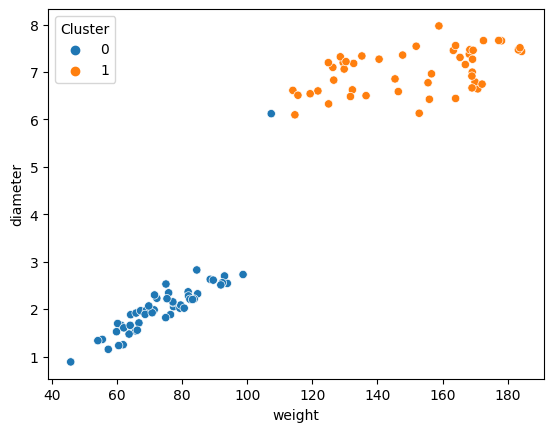

In [12]:
sns.scatterplot(data=data1_new,x="weight", y="diameter", hue="Cluster")

<Axes: xlabel='weight', ylabel='diameter'>

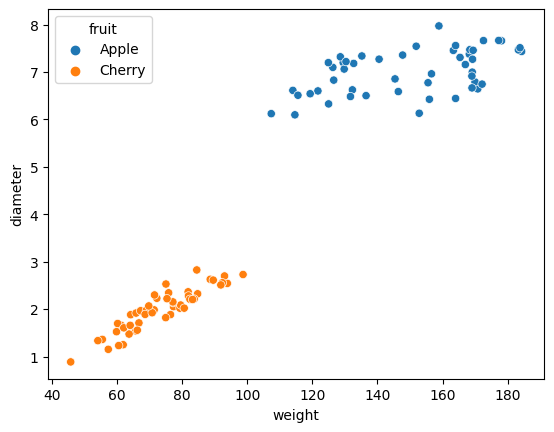

In [13]:
sns.scatterplot(data=data1_new,x="weight", y="diameter", hue="fruit")

### 2. Limits of k-means

In [14]:
data2 = pd.read_csv('./2-fruitDense.csv', sep=',')

In [15]:
clusters = KMeans(n_clusters=2).fit_predict(data2[["weight","diameter"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
clusters_col = pd.DataFrame({'Cluster':clusters})

In [17]:
data2_new = pd.concat([data2.reset_index(drop=True), clusters_col.reset_index(drop=True)], axis=1)

<Axes: xlabel='weight', ylabel='diameter'>

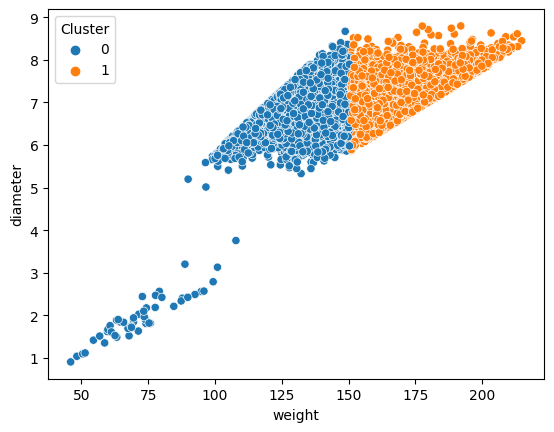

In [18]:
sns.scatterplot(data=data2_new,x="weight", y="diameter", hue="Cluster")

<Axes: xlabel='weight', ylabel='diameter'>

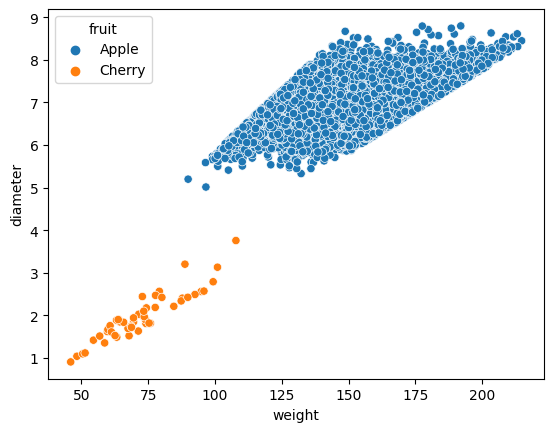

In [19]:
sns.scatterplot(data=data2_new,x="weight", y="diameter", hue="fruit")

In [20]:
data2_new[['weight','diameter']]

,weight,diameter
0,141.541817,7.363885
1,143.229432,6.608892
2,167.295518,7.073370
3,154.942545,6.950858
4,130.187309,7.247590
...,...,...
10045,155.733467,6.571942
10046,169.632256,6.997188
10047,174.676053,7.208078
10048,123.487570,6.252150


In [21]:
#Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data2_scaled = scaler.fit_transform(data2_new[['weight','diameter']])

In [22]:
data2_df = pd.DataFrame(data2_scaled)

In [23]:
data2_df

,0,1
0,-0.395020,0.632368
1,-0.314957,-0.606728
2,0.826780,0.155574
3,0.240734,-0.045493
4,-0.933697,0.441505
...,...,...
10045,0.278256,-0.667371
10046,0.937639,0.030545
10047,1.176925,0.376657
10048,-1.251544,-1.192215


In [24]:
clusters = KMeans(n_clusters=2).fit_predict(data2_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
clusters_col = pd.DataFrame({'Cluster':clusters})

In [27]:
data2_df_new = pd.concat([data2_df.reset_index(drop=True), clusters_col.reset_index(drop=True)], axis=1)

<Axes: xlabel='weight', ylabel='diameter'>

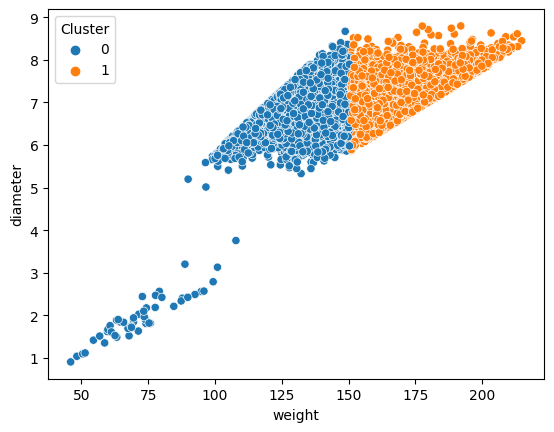

In [34]:
sns.scatterplot(data=data2_new,x="weight", y="diameter", hue="Cluster")

<Axes: xlabel='weight', ylabel='diameter'>

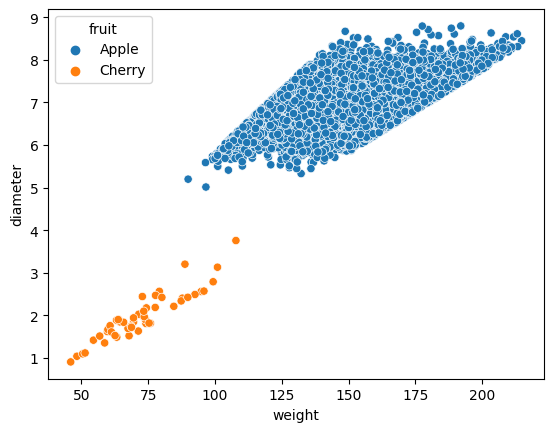

In [35]:
sns.scatterplot(data=data2_new,x="weight", y="diameter", hue="fruit")

exemple 3

In [36]:
data3 = pd.read_csv('./3-fruitPassion.csv', sep=',')

In [37]:
clusters = KMeans(n_clusters=2).fit_predict(data3[["weight","diameter"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
clusters_col = pd.DataFrame({'Cluster':clusters})

In [39]:
data3_new = pd.concat([data3.reset_index(drop=True), clusters_col.reset_index(drop=True)], axis=1)

<Axes: xlabel='weight', ylabel='diameter'>

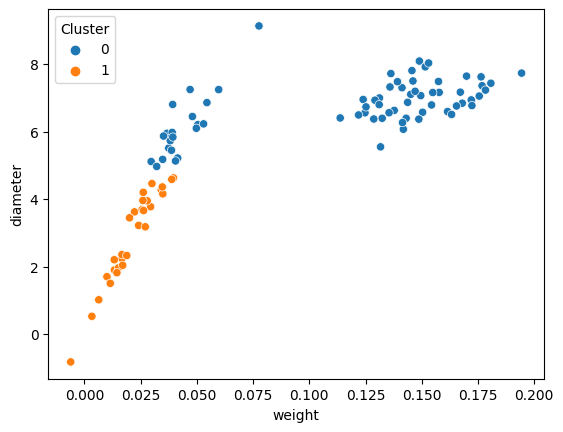

In [40]:
sns.scatterplot(data=data3_new,x="weight", y="diameter", hue="Cluster")

<Axes: xlabel='weight', ylabel='diameter'>

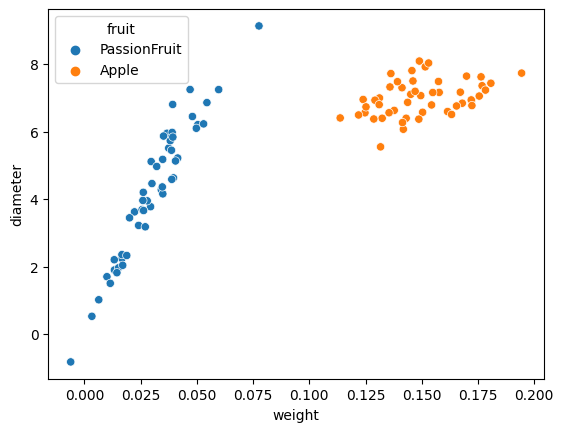

In [41]:
sns.scatterplot(data=data3_new,x="weight", y="diameter", hue="fruit")

In [42]:
from sklearn.mixture import BayesianGaussianMixture

In [43]:
data3 = data3[['weight', 'diameter']]

In [44]:
bgm = BayesianGaussianMixture(n_components=2, random_state=42).fit(data3)

In [45]:
clusters = bgm.predict(data3)

In [46]:
clusters_col = pd.DataFrame({'Cluster':clusters})

In [47]:
data3_new = pd.concat([data3.reset_index(drop=True), clusters_col.reset_index(drop=True)], axis=1)

<Axes: xlabel='weight', ylabel='diameter'>

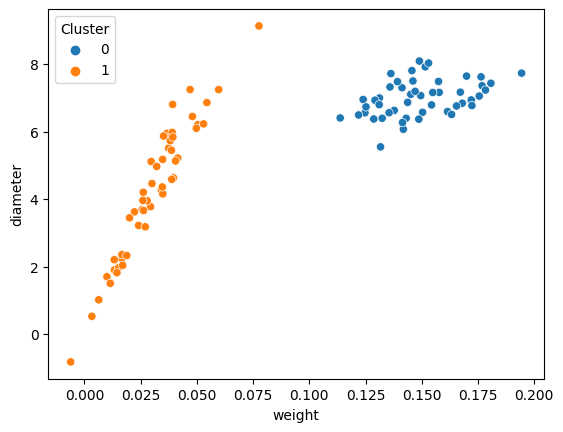

In [48]:
sns.scatterplot(data=data3_new,x="weight", y="diameter", hue="Cluster")

In [49]:
from sklearn.cluster import DBSCAN

In [50]:
dbscan = DBSCAN().fit(data3)

In [51]:
clusters = dbscan.labels_

In [52]:
clusters_col = pd.DataFrame({'Cluster':clusters})

In [53]:
data3_dbscan = pd.concat([data3.reset_index(drop=True), clusters_col.reset_index(drop=True)], axis=1)

<Axes: xlabel='weight', ylabel='diameter'>

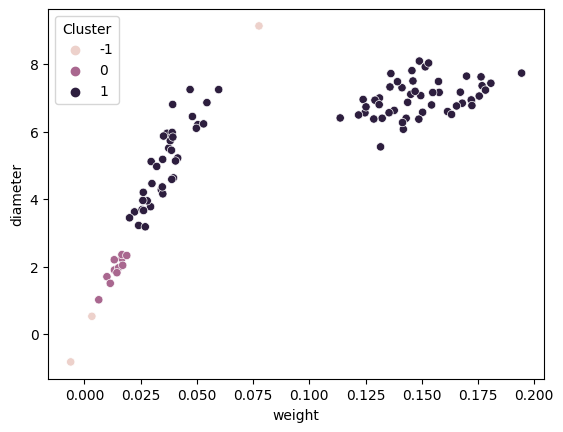

In [54]:
sns.scatterplot(data=data3_dbscan,x="weight", y="diameter", hue="Cluster")

### 3. Interpreting clusters


In [ ]:
data = pd.read_csv('./cars_synthetic.csv', sep=',')

In [ ]:
data = data[["year","length",'width','weight', 'price']]

In [ ]:
data.isna().sum()

year        0
length      0
width       0
weight    100
price       0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.weight = pd.to_numeric(data.weight, errors="coerce").notna()

In [ ]:
clusters = KMeans(n_clusters=3).fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters_col = pd.DataFrame({'Cluster':clusters})

In [ ]:
data_new = pd.concat([data.reset_index(drop=True), clusters_col.reset_index(drop=True)], axis=1)

In [ ]:
data_new.groupby("Cluster").agg(['mean',"count"])

year          length           width          weight        \
                mean count      mean count      mean count      mean count   
Cluster                                                                      
0        2021.735294   374  4.020588   374  2.133498   374  1.000000   374   
1        2016.240586   478  4.443054   478  2.458434   478  0.997908   478   
2        2022.916667    48  3.207083    48  2.022458    48  1.000000    48   

                price        
                 mean count  
Cluster                      
0        12265.585561   374  
1         7532.382845   478  
2        20448.520833    48